In [0]:
from fastai.vision import *
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Paintings'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
folder = 'dali'
file='dali.txt'

In [0]:
path = Path(base_dir)
dest= path/folder
dest.mkdir(parents = True, exist_ok = True)

In [6]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Paintings/dali.txt'),
 PosixPath('/content/gdrive/My Drive/Paintings/gogh.txt'),
 PosixPath('/content/gdrive/My Drive/Paintings/monet.txt'),
 PosixPath('/content/gdrive/My Drive/Paintings/dali')]

In [0]:
classes = ['dali','gogh','monet']

In [0]:
download_images(path/file,dest)

In [0]:
folder = 'gogh'
file = 'gogh.txt'

In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok = True)

In [11]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Paintings/dali.txt'),
 PosixPath('/content/gdrive/My Drive/Paintings/gogh.txt'),
 PosixPath('/content/gdrive/My Drive/Paintings/monet.txt'),
 PosixPath('/content/gdrive/My Drive/Paintings/dali'),
 PosixPath('/content/gdrive/My Drive/Paintings/gogh')]

In [0]:
download_images(path/file,dest)

In [0]:
folder = 'monet'
file = 'monet.txt'

In [0]:
dest = path/folder 
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file,dest)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c , delete=True , max_workers=8)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,\
                                 ds_tfms=get_transforms(),size = 224, num_workers=4).normalize(imagenet_stats)

In [22]:
data.classes, data.c

(['dali', 'gogh', 'monet'], 3)

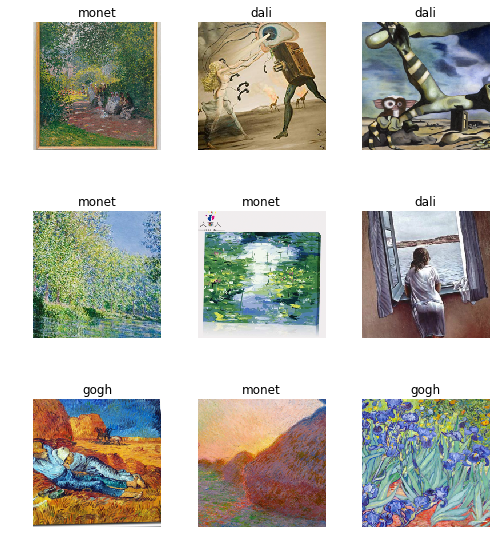

In [23]:
data.show_batch(rows=3,figsize=(7,8))

In [24]:
len(data.train_ds),len(data.valid_ds)

(233, 58)

In [25]:
learner = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 44504723.11it/s]


In [26]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.362193,1.495536,0.603448,00:16
1,0.984042,1.109512,0.344828,00:13
2,0.774817,0.754593,0.258621,00:13
3,0.631625,0.544040,0.224138,00:13


In [0]:
learner.save('stage-1')

In [0]:
learner.unfreeze()

In [30]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


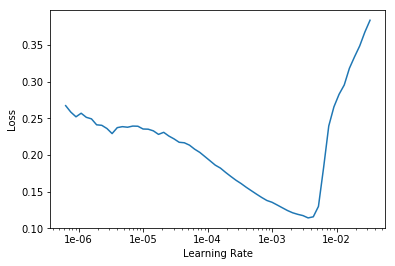

In [31]:
learner.recorder.plot() 

In [32]:
learner.fit_one_cycle(2, max_lr = slice(1e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.222588,0.336154,0.137931,00:14
1,0.178365,0.129101,0.051724,00:14


In [0]:
learner.save('stage-2')

In [34]:
learner.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (233 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dali,dali,dali,dali,dali
Path: /content/gdrive/My Drive/Paintings;

Valid: LabelList (58 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dali,monet,dali,gogh,gogh
Path: /content/gdrive/My Drive/Paintings;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, moment

In [0]:
interp=ClassificationInterpretation.from_learner(learner)

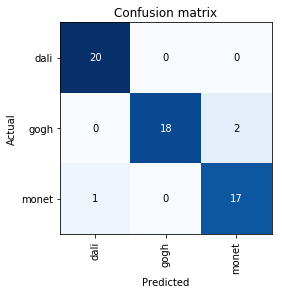

In [37]:
interp.plot_confusion_matrix()

In [0]:
learner.export()

In [0]:
img = open_image(path/'dali'/'00000000.jpg')

In [0]:
learn = load_learner(path)

In [0]:
pred_class,_,_ = learn.predict(img)

In [42]:
pred_class

Category dali